<a href="https://colab.research.google.com/github/Harshanand7/projects/blob/main/smart_question_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement 3 :- Smart question paper
Consider the attached image. Use the OpenCV contour finding function
to find the centroid and area of every contour in the image and print
it. You can use Python or C++. Share the code as a public Github
repository.

In [ ]:
!pip install gdown

In [ ]:
!pip install opencv --python


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

--python option requires 1 argument


In [ ]:
import cv2
import numpy as np
import pandas as pd
import gdown
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:

# below is the file id of the image which I had uploaded to my google drive
file_id = '1XuIkUAOYWlvd2UAE9sZyKTWGswT77mKJ'

# constructing the download URL
url = f'https://drive.google.com/uc?id={file_id}'

# specifying the output file name
output_img = 'img.png'

# downloading the  file from Google Drive
gdown.download(url, output_img, quiet=False)



Downloading...
From: https://drive.google.com/uc?id=1XuIkUAOYWlvd2UAE9sZyKTWGswT77mKJ
To: /content/img.png
100%|██████████| 35.7k/35.7k [00:00<00:00, 42.0MB/s]


'img.png'

Original image


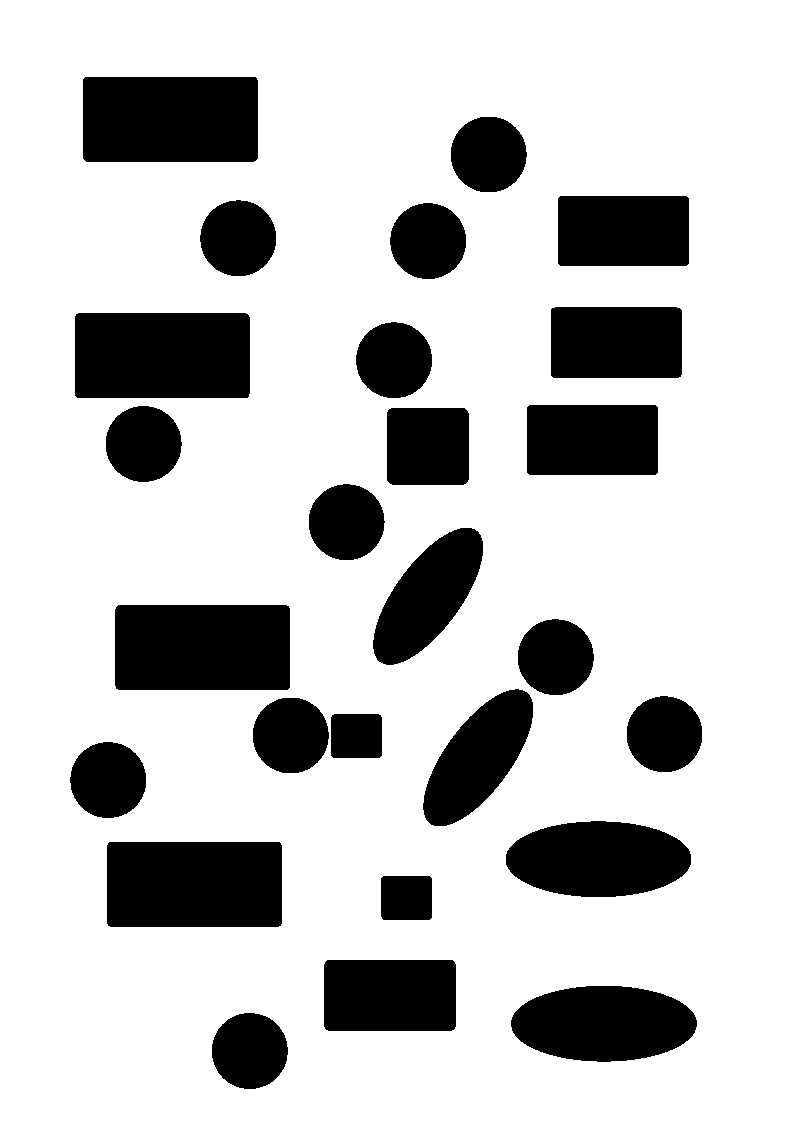

In [ ]:
# reading  the image
# displaying the image just to check whether I have imported the correct file.
image = cv2.imread(output_img, cv2.IMREAD_GRAYSCALE)
print("Original image")
cv2_imshow(image)

Inverted image


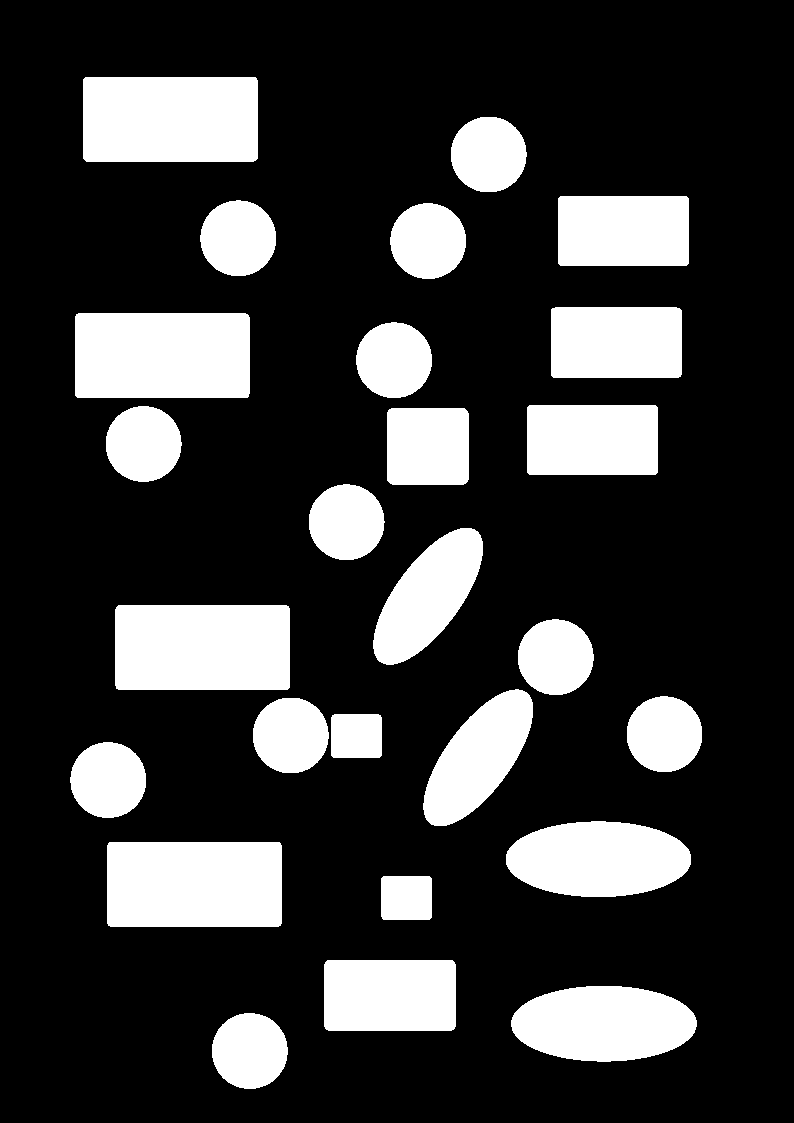

In [ ]:
# the original image is first converted to binary image keeping a threshold
# pixel value of 127 then the image is inveretd to ease out my controur detection

_, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

#dispalying the inverted thresholded binary image
print("Inverted image")
cv2_imshow(thresh)

# finding contours of the 'thresh' image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# creating a copy of the image to draw the contours and centroids
output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)




Contour 1 : Centroid: (249, 1050), Area: 4432.0
Contour 2 : Centroid: (603, 1023), Area: 10915.0
Contour 3 : Centroid: (389, 994), Area: 9146.0
Contour 4 : Centroid: (406, 897), Area: 2141.0
Contour 5 : Centroid: (194, 883), Area: 14602.0
Contour 6 : Centroid: (598, 858), Area: 10906.0
Contour 7 : Centroid: (107, 779), Area: 4433.0
Contour 8 : Centroid: (356, 735), Area: 2138.0
Contour 9 : Centroid: (290, 734), Area: 4427.0
Contour 10 : Centroid: (663, 733), Area: 4429.0
Contour 11 : Centroid: (477, 757), Area: 8260.5
Contour 12 : Centroid: (555, 656), Area: 4431.5
Contour 13 : Centroid: (202, 647), Area: 14599.5
Contour 14 : Centroid: (427, 595), Area: 8260.5
Contour 15 : Centroid: (346, 521), Area: 4429.5
Contour 16 : Centroid: (427, 445), Area: 6121.5
Contour 17 : Centroid: (143, 443), Area: 4432.0
Contour 18 : Centroid: (592, 439), Area: 8962.0
Contour 19 : Centroid: (393, 359), Area: 4431.0
Contour 20 : Centroid: (161, 355), Area: 14599.5
Contour 21 : Centroid: (615, 342), Area: 9

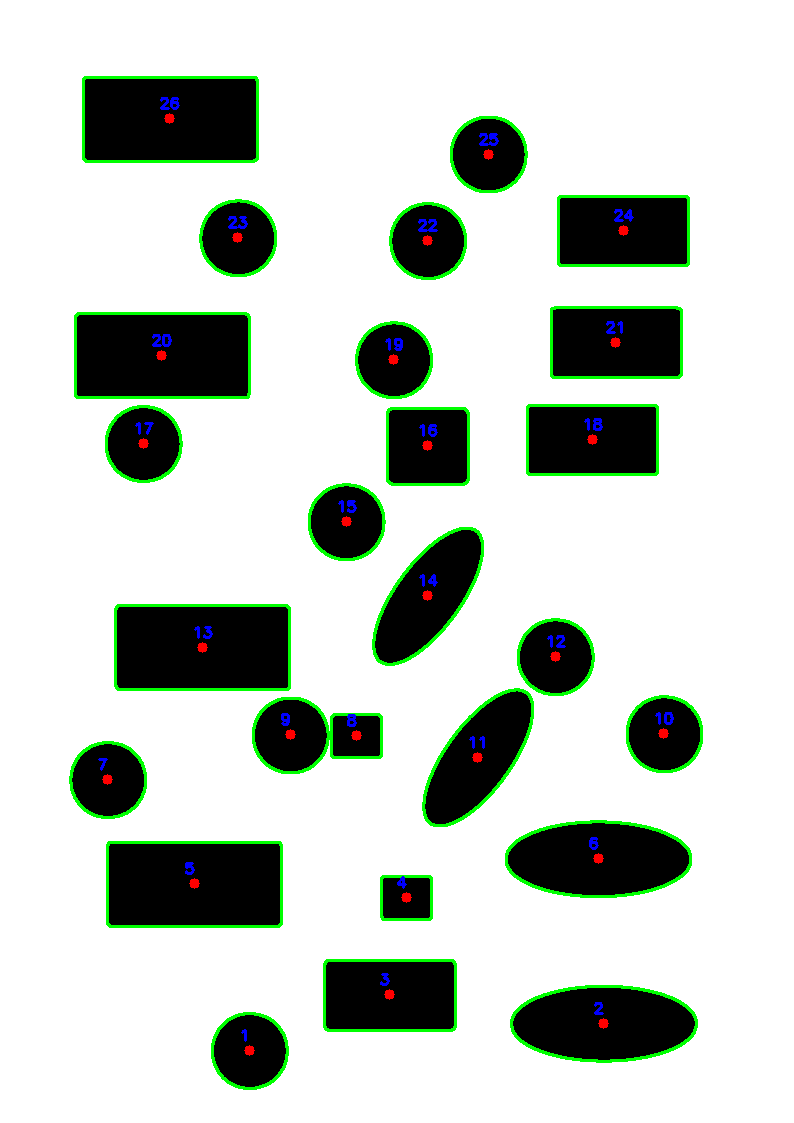

In [ ]:
# iterating over each contour to find the centroid and area
for i, contour in enumerate(contours):
    # calculateing the area of the contour
    area = cv2.contourArea(contour)

    # the centroid has been calculated using moments of the contour

    # calculating the moments for each contour
    M = cv2.moments(contour)

    if M["m00"] != 0:
        # calculating the centroid
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    # drawing the contour and centroid on the output image
    cv2.drawContours(output_image, [contour], -1, (0, 255, 0), 2)
    cv2.circle(output_image, (cX, cY), 5, (0, 0, 255), -1)

    # the indexing has been done to the contours to identify their centroids and area the
    # output has the contour number with the respective centroid and area.
    cv2.putText(output_image, f"{i+1}", (cX - 10, cY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # printing the centroid and area of the respecryive contrours with their index number.
    print(f"Contour {i+1} : Centroid: ({cX}, {cY}), Area: {area}")

# displaying the output image


cv2_imshow(output_image)
